

# Modéliser la forme de bulles - surfaces minimales
<div style="text-align: justify">
Imaginez que vous plongez un cadre de métal (de forme quelconque) dans dans de l'eau savonneuse. Lorsque vous le retirez, une bulle de savon s'y accroche, et prend une forme particulière: c'est celle d'une <b>surface minimale</b>, une surface qui minimise son aire tout en respectant une contrainte, celle imposée par l'accrochage de la bulle au cadre.

<img alt="image d'une bulle de savon sur cadre en métal" src="https://i.ytimg.com/vi/jReQUm9EB9k/maxresdefault.jpg" style="width: 400px;"/>

Ces surfaces minimales sont solution de l'**équation de Lagrange**, exprimée plus bas en $(1.1)$. Nous proposons de résoudre une version simplifiée de cette équation, afin de déterminer la forme que prendraient des bulles de savon sur un cadre quelconque, sans avoir à faire l'expérience avec du vrai savon.
</div>



## Modélisation

<p style="text-align: center"><b>Schéma du domaine de résolution et d'un exemple de cadre sur lequel est accrochée la bulle (en rotation)</b></p>

![Schéma du domaine de résolution et d'un exemple de cadre sur lequel est accrochée la bulle](https://i.imgur.com/zgLyNaU.gif)

<img src="https://i.imgur.com/eZ9NBTQ.png" width="800px" alt="[Schéma du domaine de résolution et d'un exemple de cadre sur lequel est accrochée la bulle"></img>
<p style="text-align: center"><b>Schéma du domaine de résolution et d'un exemple de cadre sur lequel est accrochée la bulle (vu du haut)</b></p>



(Le code utilisé pour générer les figures ci-dessus est consultable [ici](https://pastebin.com/icrms2Nr)).

<div style="text-align: justify">
On se place dans un repère tridimensionnel orthonormé $(x,y,z)$. On suppose que la bulle est présente au-dessus d'une surface $\Omega$ dans le plan $(x,y)$, à une hauteur $f(x,y)$ au-dessus du plan. La bulle possède une énergie surfacique de tension de surface adimensionnée $L=\sqrt{1+f_x^2+f_y^2}$ (en notant $f_r$ la dérivée partielle de f par rapport à une variable d'espace $r$).

$L$ vérifie [l'équation d'Euler-Lagrange](https://fr.wikipedia.org/wiki/%C3%89quation_d%27Euler-Lagrange), soit $\frac{\partial L}{\partial f}-\frac{\partial }{\partial x}\frac{\partial L}{\partial f_x}-\frac{\partial }{\partial y}\frac{\partial L}{\partial f_y}=0$.

En remplaçant $L$ par sa valeur citée précédemment, on obtient $-\frac{\partial }{\partial x}\left ( \frac{f_x}{\sqrt{1+f_x^2+f_y^2}} \right )-\frac{\partial }{\partial y}\left ( \frac{f_y}{\sqrt{1+f_x^2+f_y^2}} \right )=0$.

En simplifiant cette équation, on obtient l'**équation de Lagrange**: 
\begin{equation}
\tag{1.1}
(1+f_x^2) f_{yy}-2 f_x f_y f_{xy}+(1+f_y^2) f_{xx}=0
\end{equation}
où $f_{qr}$ est $f$ dérivée deux fois: une fois par rapport à une variable $q$, puis une fois par rapport à $r$.


Cette équation non linéaire dépasse le cadre du cours. Mais dans le cas $ f_{xx}^2, f_{yy}^2 << 1 $, on déduit, par approximation, $f_{xx} + f_{yy}=0$, c'est à dire: 
$$\Delta f=0$$

Les conditions limites au bord sont de type Dirichlet, et sont imposées par le cadre sur lequel est accroché la bulle ($f_{\partial \Omega}=m$ signifie ici "$f$ restreint à $\partial \Omega$"): 
$$f_{\partial \Omega}=m$$
avec m une fonction continue définie sur $\partial \Omega$, le bord extérieur de $\Omega$ et à valeurs dans $\mathbb{R}$.
$f$ vérifie également des conditions de type Dirichlet (imposées aussi par le cadre) sur un segment intérieur $[AB]$: $$f_{[AB]} = n$$
avec n une fonction continue définie sur $[AB]$.

</div>

## Équations


Les équations à résoudre se présentent comme suit:

Nous choisissons pour le domaine adimensionné un polygone (y compris son intérieur) $\Omega \subset ]0,1[\times ]0,1[$, comportant un segment $[AB]$ qui le traverse, où A et B sont deux sommets du polygone. On fixe $m$ et $n$ des fonctions de $\partial \Omega$ et $[AB]$ (respectivement) dans $\mathbb{R}$, telles que la fonction suivante soit **continue, et affine par morceaux entre deux sommets**: $$p:[AB] \cup \partial \Omega \rightarrow \mathbb{R}\\
x \mapsto \begin{cases}
m(x)\hspace{1ex}si\hspace{1ex} x \in \partial \Omega\\
n(x)\hspace{1ex}si\hspace{1ex} x \in [AB]\\
\end{cases} $$

$m$ et $n$ sont des fonctions telles que $(x,y)$ étant donné, $m(x,y)$ ou $n(x,y)$ est la hauteur du cadre au-dessus du point $(x,y,0)$.

Enfin, l'équation à résoudre est la suivante:

\begin{equation}\label{eq1:evol_adim}
\tag{1.2}
\begin{cases}
\Delta f=0\\
f_{[AB] \cup \partial \Omega} = p\hspace{3mm}(CL)
\end{cases}
\end{equation}

# Simulations avec FEniCS

## Import des modules utilisés

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
from dolfin import *
from matplotlib import cm
from mshr import *
import numpy.random as rd
import matplotlib.lines as mlines

from mpl_toolkits.mplot3d import Axes3D  # pour graphique 3D


## Définition du domaine de résolution $\Omega$
<div style="text-align: justify">
    On appelle <b>carré unité</b> le carré du plan $(x,y)$ représenté ci-dessous:
    <code>
                     
            0  
           
  (0,1)------------(1,1)                      
    |                |       (Les numéros à côté des segments montrent le numéro du segment le plus proche)             
    |                |                       
  3 |                | 1                      
    |                |                      
    |                |                      
  (0,0)------------(1,0)                    
            2                          
</code>
Chaque côté du carré unité comporte un ou deux sommets (le nombre est choisi selon une loi uniforme dans $\{1,2\}$), donc le polygone $\Omega$ possède entre 4 et 8 sommets. La position des sommets sur le côté est aléatoire, suivant une loi uniforme sur $[\frac{1}{5}, \frac{4}{5}]$ (s'il n'y en a qu'un seul) ou une loi uniforme sur $[\frac{1}{5}, \frac{1}{2}]$ (pour le premier) et $[\frac{1}{2}, \frac{4}{5}]$ (pour le deuxième) s'il y en a deux.

Les conditions de Dirichlet sont appliquées à la fois sur le contour du domaine $\Omega$, et sur un segment le traversant en reliant deux sommets. La position de ce segment est également choisie de façon aléatoire.

On numérote les sommets et les arêtes de $\Omega$ de $0$ à $n-1$, l'arête $i$ étant celle reliant le sommet $i$ au sommet $i+1$.
</div>

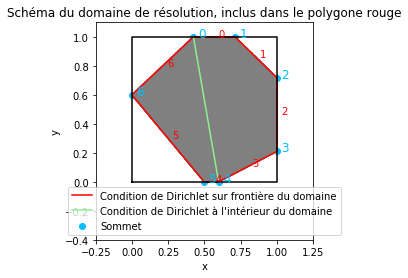

In [2]:

def get_coord_aleat(i, mini, maxi):
    """obtenir coordonnées du sommet sur coté i du carré unité, à avancement compris entre mini et maxi"""
    aleat = rd.random()
    avancement_sur_le_cote = mini + aleat*(maxi-mini)
    if i == 0:
        return (avancement_sur_le_cote,1)
    elif i == 1:
        return (1, avancement_sur_le_cote)
    elif i == 2:
        return (avancement_sur_le_cote,0)
    elif i == 3:
        return (0, avancement_sur_le_cote)


# initialiser les sommets du polygone renfermant le domaine omega
sommets = []

for i in range(4):
    if rd.random() < .5: # un sommet sur ce côté
        sommets.append(get_coord_aleat(i, 1/5, 4/5))
    else: # deux sommets sur ce côté
        if i == 1 or i == 2:
            """separation pour assurer que les points soient dans l'ordre horaire"""
            sommets.append(get_coord_aleat(i, 1/2, 4/5))
            sommets.append(get_coord_aleat(i, 1/5, 1/2))

        else:
            sommets.append(get_coord_aleat(i, 1/5, 1/2))
            sommets.append(get_coord_aleat(i, 1/2, 4/5))
        
n = len(sommets)
segments = [(sommets[i], sommets[(i+1) % n]) for i in range(n)]

# choisir position du segment intérieur
premier_indice = rd.randint(0, n) # determine la position du segment
deuxieme_indice = (premier_indice + (n//2)) % n # entre 0 et n-1 inclus

x, y = [sommets[premier_indice][0], sommets[deuxieme_indice][0]], [sommets[premier_indice][1], sommets[deuxieme_indice][1]] 

plt.figure()
a = np.array(sommets)
point_bleu = plt.scatter(a[:,0],a[:,1], c='#00BFFF', label='Sommet')

sommets_points = [Point(somm[0], somm[1]) for somm in sommets]
p = Polygon(sommets_points[::-1])
mesh = generate_mesh(p, 40)
plot(mesh)

for i in range(len(a)):
    plt.text(a[i,0]+.03, a[i,1], i, fontsize=12, color='#00BFFF')
    
    plt.plot([a[i,0], a[(i+1)%n, 0]], [a[i,1], a[(i+1)%n, 1]], 'r')
    plt.text(.5*(a[i,0]+a[(i+1)%n,0]) + .03, .5*(a[i,1]+a[(i+1)%n,1]), i, color='red')

ligne_verte, = plt.plot(x,y,'#90EE90',label="Condition de Dirichlet à l'intérieur du domaine")

plt.xlim(-.25,1.25)
plt.ylim(-.4,1.1)

plt.xlabel('x')
plt.ylabel('y')
plt.title("Schéma du domaine de résolution, inclus dans le polygone rouge")



ligne_rouge = mlines.Line2D([], [], color='red', label='Condition de Dirichlet sur frontière du domaine')
plt.legend(handles=[ligne_rouge, ligne_verte, point_bleu], loc="lower center")

plt.plot([0,1,1,0,0], [0,0,1,1,0], 'k') # carré unité

# plt.legend()
plt.show()



## Définition des conditions aux limites

### Fonctions déterminant si un point donné doit être soumis à des conditions de Dirichlet
Les fonctions ci-dessous utilisent le calcul de la distance entre un point et un plan, détaillé dans les références à la fin du notebook.

In [3]:

tol = 1e-2

# à l'extérieur

def est_sur_droite(x, i):
    """renvoie vrai ssi le point x est sur la droite i (sur frontière extérieure du domaine Omega)"""
    x0, y0 = sommets[i] 
    x1, y1 = sommets[(i+1) % n]
    a = -(y1-y0)
    b = x1-x0
    A = a*x[0] + b*x[1] - x0*a - y0*b
    D = abs(A)/np.sqrt(a**2+b**2) # distance de x à la droite numéro i
    if D <= tol:
        return True
    else:
        return False

# à l'intérieur
def est_sur_droite_interieur(x):
    """renvoie vrai si le point x est sur droite intérieure où condition de Dirichlet est appliquée"""
    x0, y0 = sommets[premier_indice] 
    x1, y1 = sommets[deuxieme_indice]
    a = -(y1-y0)
    b = x1-x0
    A = a*x[0] + b*x[1] - x0*a - y0*b
    D = abs(A)/np.sqrt(a**2+b**2)
    if D <= tol:
        return True
    else:
        return False


### Définition des objets DirichletBC imposant les conditions limite
<div style="text-align: justify">
    Pour le contour extérieur du domaine, on fixe la valeur de la solution $f$ de la façon suivante: ses valeurs sur les sommets sont choisis de façon aléatoire. On impose alors une interpolation affine sur le segment du contour extérieur reliant deux sommets consécutifs, et sur le segment traversant le domaine.
    </div>

In [4]:

longueurs_des_segments = [0] * n # initialisation
for i in range(n):
    longueurs_des_segments[i] = np.sqrt((sommets[i][0]-sommets[(i+1) % n][0])**2+(sommets[i][1]-sommets[(i+1) % n][1])**2)

V = FunctionSpace(mesh, "Lagrange", 1)

# limites a l'extérieur

frontieres_segments = [] # indice correspond au numéro du segment
fct_sur_frontiere = []
cond_de_dirichlet_ext = []

valeurs_sur_sommets = .1 * (np.array([(-1)**i for i in range(n)] + rd.random(n) - .5*np.ones(n)))
# le premier terme sert à écarter la valeur de f sur deux sommets voisins.
# le deuxième comporte une part d'aléatoire


for i in range(n):
    def frontiere(x):
        return est_sur_droite(x, i)
    
    si = sommets[i]
    a = (valeurs_sur_sommets[(i+1)%n] - valeurs_sur_sommets[i]) / longueurs_des_segments[i]
    b = valeurs_sur_sommets[i]
    # interpolation affine: y = a * t + b
    
    # dans ligne ci-dessous, le sqrt(...) est la distance entre x et le sommet i
    fct = Expression("a*sqrt(pow(x[0]-si0,2)+pow(x[1]-si1,2))+b", degree=0, a=a, b=b, si0=si[0], si1=si[1])
    cond_de_dirichlet_ext.append(DirichletBC(V, fct, frontiere))

    
    
# limite à l'interieur

def sous_domaine_interieur(x):
    return est_sur_droite_interieur(x)

p = sommets[premier_indice]

a = (valeurs_sur_sommets[deuxieme_indice] - valeurs_sur_sommets[premier_indice]) / longueurs_des_segments[premier_indice]
b = valeurs_sur_sommets[premier_indice]
# interpolation affine: y = a * t + b

fct = Expression("a*sqrt(pow(x[0]-p0,2)+pow(x[1]-p1,2))+b", degree=0, a=a, b=b, p0=p[0], p1=p[1])
# fct = Constant(3)
cond_de_dirichlet_int = [DirichletBC(V, fct, sous_domaine_interieur)]


### Vérifier que les conditions limites sont bien définies
Si tout fonctionne comme prévu, la case ci-dessous doit afficher le domaine $\Omega$, lorsqu'elle est exécutée, avec les conditions limites affichées. On devrait observer l'évolution affine de la fonction entre les sommets (sur la frontière, et sur un segment traversant le domaine).

Text(0.5, 1.0, 'Représentation des conditions limites')

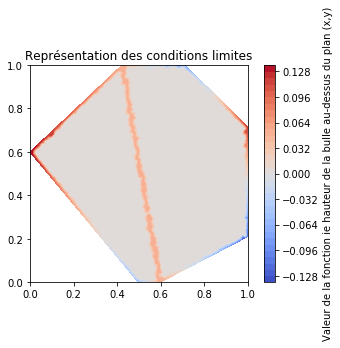

In [5]:
plt.figure()
u = Function(V)
for i in range(n):
    cond_de_dirichlet_ext[i].apply(u.vector())
cond_de_dirichlet_int[0].apply(u.vector())

m = plot(u, cmap=cm.coolwarm)
barre_de_couleur = plt.colorbar(m)
barre_de_couleur.set_label('Valeur de la fonction ie hauteur de la bulle au-dessus du plan (x,y)')

plt.title("Représentation des conditions limites")

## Résoudre

In [6]:

u = TrialFunction(V)
v = TestFunction(V)

f = Expression("0", degree=0)

a = inner(grad(u), grad(v))*dx
L = f*v*dx
# dx: integrale sur omega; ds: integrale sur bord de omega

# Calculer la solution
u = Function(V)
solve(a == L, u, cond_de_dirichlet_ext + cond_de_dirichlet_int)


### Tracer la solution

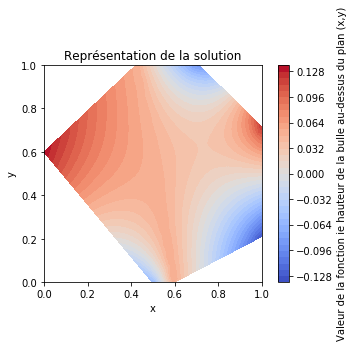

In [7]:

# Tracer la solution
plt.figure()
m = plot(u, cmap=cm.coolwarm)
plt.xlabel('x')
plt.ylabel('y')
barre_de_couleur = plt.colorbar(m)
barre_de_couleur.set_label('Valeur de la fonction ie hauteur de la bulle au-dessus du plan (x,y)')

plt.title("Représentation de la solution")
plt.show()

### Tracer la solution en 3D, pour mieux voir la forme de la bulle

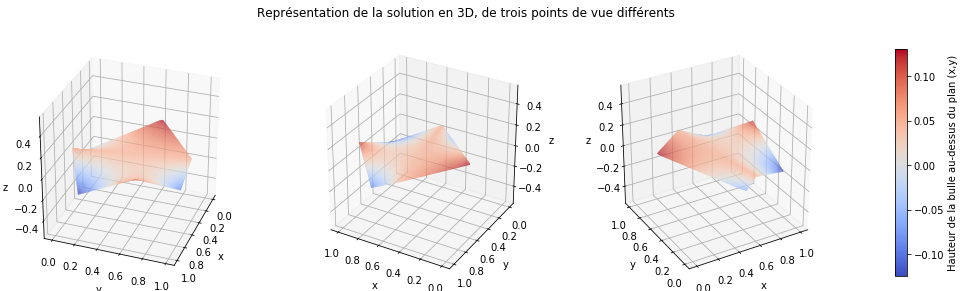

In [8]:
nb = 100
X = np.linspace(0,1, nb)
Y = np.linspace(0,1, nb)
X, Y = np.meshgrid(X, Y)

Z = np.zeros_like(X)

for i in range(len(Z)):
    for j in range(len(Z[0])):
        try:
            Z[i,j] = u(X[i,j], Y[i,j])
        except RuntimeError: # u pas défini en ce point, car il est en dehors du domaine Omega
            Z[i,j] = -5 # marquer comme hors de Omega

            
X = list(np.reshape(X, np.size(X)))
Y = list(np.reshape(Y, np.size(Y)))
Z = list(np.reshape(Z, np.size(Z)))

for i in range(nb**2-1, -1, -1): 
    if Z[i] == -5: # retirer points hors du domaine Omega
        del Z[i]
        del Y[i]
        del X[i]

# tracer la surface.
fig, axs = plt.subplots(1,3, subplot_kw=dict(projection='3d'), figsize=(17,4.5))
angles = [20,120, 240]
for i in range(3):
    ax = axs[i]
#     ax = fig.gca(projection='3d')

    surf = ax.plot_trisurf(X, Y, Z, cmap=cm.coolwarm, linewidth=0)

    ax.view_init(azim=angles[i])

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    # faire boîte pour éviter d'étirer trop la figure
    
    sc = ax.scatter([0,1,0,1],[0,1,0,1],[-.5,-.5,.5,.5])
    sc.set_visible(False)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.01, 0.7])
cb = fig.colorbar(surf, cax=cbar_ax)

# cb = fig.colorbar(surf)
cb.set_label("Hauteur de la bulle au-dessus du plan (x,y)")
fig.suptitle("Représentation de la solution en 3D, de trois points de vue différents")

plt.show()

## Conclusion - Utilité de la simulation
<div style="text-align: justify">
Cette simulation permet de voir la forme que prendrait une bulle de savon, sans même avoir à la créer. On peut donc itérer sur des milliers de formes de bulles différentes, ce qui serait difficilement réalisable en pratique. De plus, la simulation permet d'étudier la forme que prend la bulle en l'absence de gravité, et donc de s'affranchir de cette force qui a un effet notable sur la forme des bulles de savon.
</div>

Le caractère aléatoire de la simulation permet de vérifier que notre modèle est robuste, en testant sur des formes de bulles très variées.

Toutefois, notre modèle est imparfait, et il est quand même utile de créer de vraies bulles, lorsque l'on veut s'affranchir de l'approximation $f_{xx}^2, f_{yy}^2 << 1$.



<div style="text-align: justify">
On constate qu'une bulle de savon sur un cadre prend la forme d'une surface minimale, et qu'une surface minimale est une solution de l'équation de Lagrange. 
    
Puisqu'une bulle de savon sur un cadre prend spontanément la forme d'une surface minimale, et que trouver cette surface minimale revient à résoudre l'équation de Lagrange, les bulles de savon peuvent se voir comme des ordinateurs analogiques spécialisées, remplissant une seule fonction (la résolution de l'équation de Lagrange, avec des conditions limites données) très rapidement.
</div>

## Références
Modèle donnant l'équation que nous résolvons: https://www.princeton.edu/~stonelab/Teaching/FredBraszFinalPaper.pdf

Résolution de l'équation de Poisson avec FEniCS: https://fenicsproject.org/olddocs/dolfin/1.3.0/python/demo/documented/poisson/python/documentation.html

Calcul de la distance entre un point et un plan: https://mathworld.wolfram.com/Point-PlaneDistance.html